## LFMScraper.py
Visualizes Spotify listening history between a last.fm user's top 50 artists.

The user can define a limit to how many artists are labeled by name such that the rest are grouped into "Other."

### Implementation

The data is scraped from a userpage hosted by last.fm using Beautiful Soup in `scrapeit()`, organized using Pandas in `buildit()`, and visualized using Matplotlib in `plotit()`.

In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uop
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.style.use('ggplot')

### 1. Scrape it

Takes a username and requests the HTML at the corresponding last.fm url.

Returns a 2d-array `data` that contains the artist names in the array `data[0]` and the scrobbles per artist in the array `data[1]`.

In [2]:
def scrapeit(username):
    data = []
    url = uop(str('https://www.last.fm/user/'+username+'/library/artists'))
    url_content = soup(url)
    data.append(url_content.find_all('a', {'class': 'link-block-target'}))
    data.append(url_content.find_all('span', {'class': 'chartlist-count-bar-value'}))
    return data

### 2. Build it

Builds a dataframe from the data in the last.fm HTML. Regex is used to parse the HTML for the exact integer from their otherwise newlined, comma-delimited scrobbles.

In [3]:
def buildit(data, limit):
    otherSum = 0
    u = 0
    for x in data[1][limit:]:
        otherSum += int(re.search(r'[0-9].*',data[1][u].contents[0]).group(0).replace(',',''))
        u += 1

    dataframe = pd.DataFrame(columns=['artist','plays'])
    dataframe = dataframe.set_index('artist')

    u = 0
    for x in data[0][:limit]:
        dataframe.loc[x.contents[0]] = [int(re.search(r'[0-9].*',data[1][u].contents[0]).group(0).replace(',',''))]
        u += 1

    dataframe.loc['Other'] = [otherSum]
    return dataframe

### 3. Plot it

Plots the dataframe onto a pie chart with proper formatting.

In [4]:
def plotit(dataframe):
    plot = dataframe.plot.pie(y='plays', autopct='%.1f%%', figsize=(15,15), legend=False, \
                   title='Share of Listens\n between Most Played Artists on Spotify\nusing Last.fm')
    plot.set_ylabel('')

### Example

The below chart demonstrates this program using my own username and labels limited to my top 10 artists.

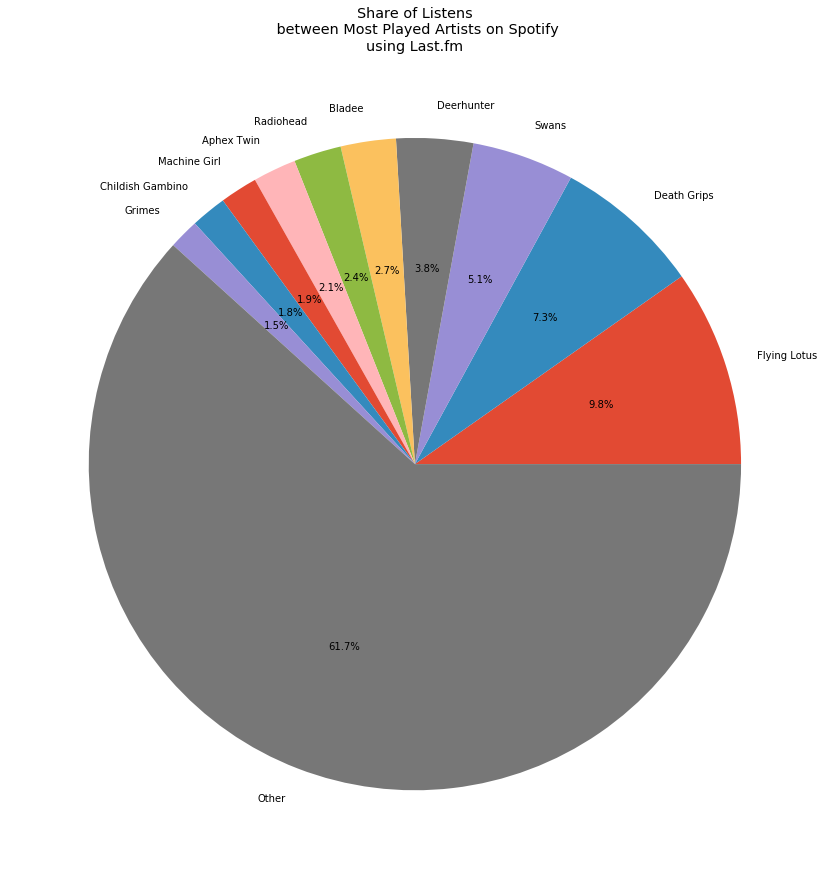

In [5]:
plotit(buildit(scrapeit("perrytech"), 10))